## Data import and cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

We will start by importing our dataset and exploring its content. Common format data can be provided is in an Excel Spreadsheet or CSV file. These types of data can be readily converted into a Panadas DataFrame.

For simplicity, we will only consider a few variables:
- Year: The column Year documents our periodically collected data (between 2002–2016)
- LinkedTrip: The annual number of linked trips, which will represent ridership. This is our dependent variable.
- Pop: The population
- Pop_Dens: The population density


In [3]:
# import your data and create a DataFrame
df = pd.read_csv('transit_ridership_reduced.csv', sep=',', encoding='latin-1')
# preview the first 15 rows in your dataset 
df.head(15)

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
0,Airdrie_2006,AIRDRIE,1,AB,2006,24494.0,33.100,28927.0,342.943908,9109.0,9109.0,2.47149,107.862885,6.223224e+05
1,Airdrie_2007,AIRDRIE,1,AB,2007,19132.0,33.100,31654.4,375.278569,9170.0,9170.0,2.30680,112.571840,6.233377e+05
2,Airdrie_2008,AIRDRIE,1,AB,2008,23940.0,33.100,34381.8,407.613247,10337.0,10337.0,2.26560,124.777920,4.732102e+05
3,Airdrie_2009,AIRDRIE,1,AB,2009,26987.0,33.100,37109.2,439.948027,10206.0,10206.0,2.23380,97.896285,5.299411e+05
4,Airdrie_2010,AIRDRIE,1,AB,2010,30251.0,33.100,39836.6,472.282583,NaN,NaN,2.19900,100.659225,9.257482e+05
5,Airdrie_2011,AIRDRIE,1,AB,2011,78954.0,33.100,42564.0,504.617492,18910.0,18910.0,2.15240,117.951520,1.808304e+06
6,Airdrie_2012,AIRDRIE,1,AB,2012,125553.0,43.394,46367.4,549.708534,17354.0,17354.0,2.09740,116.458135,1.649414e+06
7,Airdrie_2013,AIRDRIE,1,AB,2013,142769.0,53.688,50170.8,594.799634,18565.0,18565.0,2.07180,114.933105,1.669214e+06
8,Airdrie_2014,AIRDRIE,1,AB,2014,186635.0,63.982,53974.2,639.891096,18955.0,18955.0,2.04840,115.427340,1.851391e+06
9,Airdrie_2015,AIRDRIE,1,AB,2015,204422.0,74.276,57777.6,684.982096,21815.0,21815.0,2.28060,96.900160,2.117758e+06


We have a panel dataset with repeated observations from multiple agencies. How many agencies do we have in total?
We notice that we have data from 2006-2016 upon intial inspection. Is this true for all agencies?  We also see there may be values missing in the dataset.

The ridership variable in this example is "LinkedTrip" and we have independent variables related to population, transit service, transit fare and gas prices.

In [4]:
# to determine the number of agencies we have data for and for what years
df.groupby(['New_names']).size()

New_names
AIRDRIE            11
BARRIE             15
BELLEVILLE         15
BRAMPTON           15
BRANDON            15
                   ..
WOOD BUFFALO       15
Wasaga Beach        9
Waterloo Region    15
YELLOWKNIFE        15
YORK REGION        15
Length: 99, dtype: int64

Looks like we have 99 different transit agencies however, not all of them have data for the same time period. For this example let's drop all agencies that do not have 15 years' worth of data.

In [5]:
df_reduced = df.groupby('New_names').filter(lambda x: len(x) == 15)
df_reduced

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
22,Calgary_2002,CALGARY,3,AB,2002,74759500.0,706.732,900731.4,1076.716919,1640700.0,1640700.0,2.265025,83.61178,2.122108e+08
23,Calgary_2003,CALGARY,3,AB,2003,76525200.0,711.674,922596.8,1102.854062,1680080.0,1680080.0,2.472800,81.97332,2.202708e+08
24,Calgary_2004,CALGARY,3,AB,2004,79510800.0,716.616,944462.2,1128.991912,1721983.0,1721983.0,2.456000,91.85440,2.351153e+08
25,Calgary_2005,CALGARY,3,AB,2005,81120900.0,721.558,966327.6,1155.129341,1720844.0,1720844.0,2.405000,103.17450,2.201248e+08
26,Calgary_2006,CALGARY,3,AB,2006,87912023.0,726.500,988193.0,1181.266799,1813734.0,1813734.0,2.648025,108.62787,2.386724e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Whitehorse_2012,WHITEHORSE,103,YK,2012,421342.0,416.540,23637.8,58.384947,21765.0,21765.0,2.621750,139.89658,3.292748e+06
1383,Whitehorse_2013,WHITEHORSE,103,YK,2013,471232.0,416.540,23999.6,59.278590,22484.0,22484.0,2.589750,139.53573,3.523796e+06
1384,Whitehorse_2014,WHITEHORSE,103,YK,2014,546496.0,416.540,24361.4,60.172227,29878.0,29878.0,2.560500,136.62828,3.500579e+06
1385,Whitehorse_2015,WHITEHORSE,103,YK,2015,583605.0,416.540,24723.2,61.065851,31063.0,31063.0,2.534000,113.42184,4.696266e+06


In [6]:
# number of agencies after dropping those with fewer observations
df_reduced.groupby(['New_names']).size()

New_names
BARRIE             15
BELLEVILLE         15
BRAMPTON           15
BRANDON            15
BRANTFORD          15
                   ..
WINNIPEG           15
WOOD BUFFALO       15
Waterloo Region    15
YELLOWKNIFE        15
YORK REGION        15
Length: 84, dtype: int64

<b>Handling Missing Data</b> 

Real world data is often messy and usually contains missing values. Missing data can skew your analysis, result in biased estimates and ultimately impact the validity of your results. Some things to first consider when handling missing data is to understand the reason why data is missing.

1. <b>Missing at Random (MAR):</b> There is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. The data is not missing across all observations but only within sub-samples of the data.

2. <b>Missing Completely at Random (MCAR):</b> There is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others. It is typically safe to remove MCAR data because the results will be unbiased. The test may not be as powerful, but the results will be reliable.

3. <b>Missing not at Random (MNAR):</b> There is a relationship between the propensity of a value to be missing and its values. There appear to be reasons the data is missing. Therefore, simply removing observations with missing data could result in a model with bias.

Based on what type of missing data exist in your dataset, you can decide the best method for handling the missing values. Some method include:

<b>Deletion</b><br></br>
You can choose to delete data listwise or by dropping variables. In listwise, all data for an observation that has one or more missing values are deleted. The analysis is run only on observations that have a complete set of data. In most cases, the data are not missing completely at random (MCAR). Deleting the instances with missing observations can result in biased parameters and estimates and reduce the statistical power of the analysis. 

With regards to dropping variables, if data is missing for more than 60% of the observations, it may be wise to discard it if the variable is insignificant.

<b>Imputation</b><br></br>
When data is missing, it may make sense to delete data, as mentioned above. However, that may not be the most effective option. For example, if too much information is discarded, it may not be possible to complete a reliable analysis. 

Instead of deletion, there are multiple solutions to impute the value of missing data. Depending why the data are missing, imputation methods can deliver reasonably reliable results. These are examples of single imputation methods for replacing missing data.
- Mean/Median imputation: The missing value is replaced with the mean/median of observed values. This method maintains the sample size and is easy to use, but the variability in the data is reduced, so the standard deviations and the variance estimates tend to be underestimated. This will also give poor results to categorical data.
- Mode imputation: The missing value is replaced with the most frequent value. This method can work well for categorical variables but may also introduce bias in the results.
- Last observation carried forward: This technique imputes the missing value with the last observation of the individual. This method makes the assumption that the observation of the individual has not changed at all since the last measured observation.
- Interpolation/Extrapolation: This method estimate values from other observations within the range of a discrete set of known data points.
- Regression imputation: The imputed value is predicted from a regression equation. For this method the information in the complete observations is used to predict the values of the missing observations. 

Multiple imputation methods can also be applied (e.g., MICE) and generally produce better results, but are more complicated to implement. Python has a lot of built in libraries that can preform these imputations. 

Example tutorial of handling missing data in Python: https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93

<b>Subsetting the DataFrame</b>

Often times you will find that not all columns in a dataset is useful to you, or you are only interested in investigating a certain aspect of the data. There are many ways to either remove unwanted columns or subselect data using Pandas. In this example, let's say we are only interested in ridership data from the TTC between the years 2002 to 2016 and we want to investigate the impact of fuel prices, fare, transit service, and population density on ridership

In [7]:
df_ttc = df_reduced[df_reduced["New_names"] == 'TORONTO']
df_ttc

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
1143,Toronto_2002,TORONTO,86,ON,2002,415539000.0,629.964,2485851.4,3738.081908,8529641.0,8529641.0,2.912175,87.10639,1.118988e+09
1144,Toronto_2003,TORONTO,86,ON,2003,405412000.0,630.018,2490208.8,3744.632649,8579086.0,8579086.0,2.781900,87.66076,1.115268e+09
1145,Toronto_2004,TORONTO,86,ON,2004,418099000.0,630.072,2494566.2,3751.184366,8400000.0,8400000.0,2.763000,94.06480,1.149088e+09
1146,Toronto_2005,TORONTO,86,ON,2005,431220000.0,630.126,2498923.6,3757.737024,8426375.0,8426375.0,3.006250,107.02250,1.188493e+09
1147,Toronto_2006,TORONTO,86,ON,2006,444544000.0,630.180,2503281.0,3764.289837,8554497.0,8554497.0,3.236475,109.92246,1.229921e+09
1148,Toronto_2007,TORONTO,86,ON,2007,459769000.0,630.186,2525636.8,3797.907742,8677092.0,8677092.0,3.171850,112.34116,1.301321e+09
1149,Toronto_2008,TORONTO,86,ON,2008,466700000.0,630.192,2547992.6,3831.526244,8921966.0,8921966.0,3.115200,124.83456,1.372301e+09
1150,Toronto_2009,TORONTO,86,ON,2009,471233000.0,630.198,2570348.4,3865.143931,9516036.0,9516036.0,3.071475,102.30804,1.487474e+09
1151,Toronto_2010,TORONTO,86,ON,2010,477357000.0,630.204,2592704.2,3898.758702,9569501.0,9569501.0,3.298500,112.03905,1.527036e+09
1152,Toronto_2011,TORONTO,86,ON,2011,500219000.0,630.210,2615060.0,3932.377564,9642194.0,9642194.0,3.228600,133.55642,1.574907e+09


In [8]:
# let's drop the LandArea cokumn because we are not interested in it
df_ttc = df_ttc.drop(columns=['LandArea'])
df_ttc

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
1143,Toronto_2002,TORONTO,86,ON,2002,415539000.0,2485851.4,3738.081908,8529641.0,8529641.0,2.912175,87.10639,1.118988e+09
1144,Toronto_2003,TORONTO,86,ON,2003,405412000.0,2490208.8,3744.632649,8579086.0,8579086.0,2.781900,87.66076,1.115268e+09
1145,Toronto_2004,TORONTO,86,ON,2004,418099000.0,2494566.2,3751.184366,8400000.0,8400000.0,2.763000,94.06480,1.149088e+09
1146,Toronto_2005,TORONTO,86,ON,2005,431220000.0,2498923.6,3757.737024,8426375.0,8426375.0,3.006250,107.02250,1.188493e+09
1147,Toronto_2006,TORONTO,86,ON,2006,444544000.0,2503281.0,3764.289837,8554497.0,8554497.0,3.236475,109.92246,1.229921e+09
1148,Toronto_2007,TORONTO,86,ON,2007,459769000.0,2525636.8,3797.907742,8677092.0,8677092.0,3.171850,112.34116,1.301321e+09
1149,Toronto_2008,TORONTO,86,ON,2008,466700000.0,2547992.6,3831.526244,8921966.0,8921966.0,3.115200,124.83456,1.372301e+09
1150,Toronto_2009,TORONTO,86,ON,2009,471233000.0,2570348.4,3865.143931,9516036.0,9516036.0,3.071475,102.30804,1.487474e+09
1151,Toronto_2010,TORONTO,86,ON,2010,477357000.0,2592704.2,3898.758702,9569501.0,9569501.0,3.298500,112.03905,1.527036e+09
1152,Toronto_2011,TORONTO,86,ON,2011,500219000.0,2615060.0,3932.377564,9642194.0,9642194.0,3.228600,133.55642,1.574907e+09


<b>Merging Datasets</b> 

Merging the dataset is the process of combining two datasets in one, and line up rows based on some particular or common property for data analysis. It is very common to need to pull data from multiple sources. You can join two datasets as long as there are matching values in one or more key columns. An example of this can be seen below:

In [9]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Jenny', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Jenny', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Jenny,Engineering
3,Sue,HR


In [10]:
df2

,employee,hire_date
0,Jenny,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [11]:
df3 = pd.merge(df1, df2, on='employee')
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Jenny,Engineering,2004
3,Sue,HR,2014


## Descriptive Analysis
It is good to get an understanding of your dataset before developing any models. We can obtain some descriptive statistics and also plot some visuals to see trends and relationships.

In [12]:
# descriptive summary of the variables
df_ttc[['LinkedTrip', 'Pop', 'Pop_Dens', 'RvnHours', 'RvnKM', 'AdCash_Fare', 'Gas_P_Adj', 'OpCost_Adj']].describe()

,LinkedTrip,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
count,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,1.500000e+01
mean,4.759855e+08,2.583294e+06,3884.609092,9.351690e+06,9.351690e+06,3.080175,111.744585,1.415009e+09
std,4.699395e+07,8.556754e+04,128.671845,8.423997e+05,8.423997e+05,0.160944,16.173266,2.163898e+08
min,4.054120e+08,2.485851e+06,3738.081908,8.400000e+06,8.400000e+06,2.763000,87.106390,1.115268e+09
25%,4.378820e+08,2.501102e+06,3761.013431,8.566792e+06,8.566792e+06,3.023525,101.504020,1.209207e+09
50%,4.712330e+08,2.570348e+06,3865.143931,9.516036e+06,9.516036e+06,3.107700,109.922460,1.487474e+09
75%,5.196005e+08,2.650013e+06,3984.938532,9.824234e+06,9.824234e+06,3.200225,128.170920,1.561958e+09
max,5.380790e+08,2.731571e+06,4107.579070,1.099267e+07,1.099267e+07,3.298500,133.556420,1.716246e+09


Looking at the mean, median and range gives you a better understanding of your dataset and also helps you identify if there are any errors in your data.

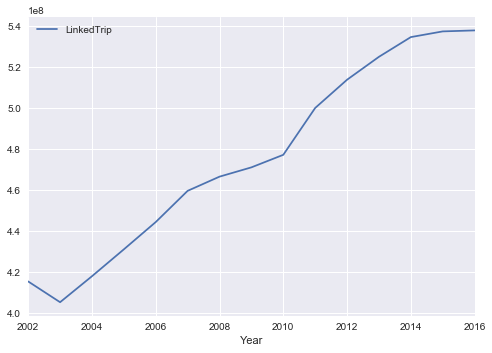

In [13]:
# TTC ridership over the years
matplotlib.style.use('seaborn')
df_ttc.plot.line(x='Year', y='LinkedTrip')

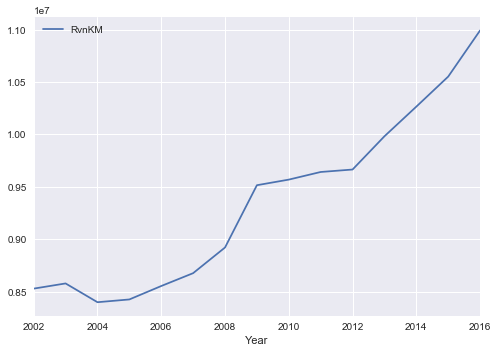

In [14]:
# TTC ridership over the years
matplotlib.style.use('seaborn')
df_ttc.plot.line(x='Year', y='RvnKM')

In [15]:
# Correlation analysis
df_ttc[['LinkedTrip', 'Pop', 'Pop_Dens', 'RvnHours', 'RvnKM', 'AdCash_Fare', 'Gas_P_Adj', 'OpCost_Adj']].corr()

,LinkedTrip,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
LinkedTrip,1.000000,0.974017,0.974018,0.938058,0.938058,0.581946,0.655924,0.968912
Pop,0.974017,1.000000,1.000000,0.985542,0.985542,0.475338,0.502853,0.962891
Pop_Dens,0.974018,1.000000,1.000000,0.985542,0.985542,0.475337,0.502854,0.962891
RvnHours,0.938058,0.985542,0.985542,1.000000,1.000000,0.468419,0.394517,0.957095
RvnKM,0.938058,0.985542,0.985542,1.000000,1.000000,0.468419,0.394517,0.957095
AdCash_Fare,0.581946,0.475338,0.475337,0.468419,0.468419,1.000000,0.575731,0.609247
Gas_P_Adj,0.655924,0.502853,0.502854,0.394517,0.394517,0.575731,1.000000,0.575197
OpCost_Adj,0.968912,0.962891,0.962891,0.957095,0.957095,0.609247,0.575197,1.000000


## OLS Regression Model
We will first build a simple multivariate OLS regression model to estimate the effects of transit supply, fare and gas prices on ridership.

In [59]:
import statsmodels.api as sm

In [60]:
X = df_ttc[['RvnKM', 'AdCash_Fare', 'Gas_P_Adj']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip']

C:\Users\LPLEN00245\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
model.summary()

C:\Users\LPLEN00245\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LinkedTrip   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.80e-09
Time:                        23:32:33   Log-Likelihood:                -257.49
No. Observations:                  15   AIC:                             523.0
Df Residuals:                      11   BIC:                             525.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.384e+07   4.33e+07     -1.475      0.168   -1.59e+08    3.14e+07
RvnKM          44.6085      2.938     15.183      0.000      38.142      51.075
AdCash_Fare  4.966e+06   1.73e+07      0.287      0.779   -3.31e+07     4.3e+07
Gas_P_Adj    9.608e+05   1.65e+05      5.810      0.000    5.97e+05    1.32e+06
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.141
Skew:                           0.089   Prob(JB):                        0.932
Kurtosis:                       2.560   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To make the coefficients easier to compare between the independent variables, one option is to apply a transformation. We could normalize the variables so they are of similar scale or apply a log transformation to get the coefficients as elasticities.

In [20]:
# get the natural log for each of the variables in this dataset
# we can write it as a loop to make things easier

# first get names of all variables as a list
var_list = df_ttc.columns
#remove columns we are not transforming
var_list = var_list[5:]

#loop each variable to apply the natural log transformation
for var in var_list:
    #give the column a new name
    new_var = var + "_ln"
    df_ttc[new_var] = np.log(df_ttc[var])

In [21]:
#check if new columns of log transformed values were added
df_ttc

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,Pop,Pop_Dens,RvnHours,RvnKM,...,Gas_P_Adj,OpCost_Adj,LinkedTrip_ln,Pop_ln,Pop_Dens_ln,RvnHours_ln,RvnKM_ln,AdCash_Fare_ln,Gas_P_Adj_ln,OpCost_Adj_ln
1143,Toronto_2002,TORONTO,86,ON,2002,415539000.0,2485851.4,3738.081908,8529641.0,8529641.0,...,87.10639,1.118988e+09,19.845087,14.726126,8.226328,15.959058,15.959058,1.068900,4.467130,20.835691
1144,Toronto_2003,TORONTO,86,ON,2003,405412000.0,2490208.8,3744.632649,8579086.0,8579086.0,...,87.66076,1.115268e+09,19.820414,14.727877,8.228079,15.964838,15.964838,1.023134,4.473474,20.832361
1145,Toronto_2004,TORONTO,86,ON,2004,418099000.0,2494566.2,3751.184366,8400000.0,8400000.0,...,94.06480,1.149088e+09,19.851229,14.729625,8.229827,15.943742,15.943742,1.016317,4.543984,20.862234
1146,Toronto_2005,TORONTO,86,ON,2005,431220000.0,2498923.6,3757.737024,8426375.0,8426375.0,...,107.02250,1.188493e+09,19.882129,14.731371,8.231572,15.946877,15.946877,1.100693,4.673039,20.895952
1147,Toronto_2006,TORONTO,86,ON,2006,444544000.0,2503281.0,3764.289837,8554497.0,8554497.0,...,109.92246,1.229921e+09,19.912560,14.733113,8.233315,15.961968,15.961968,1.174485,4.699775,20.930216
1148,Toronto_2007,TORONTO,86,ON,2007,459769000.0,2525636.8,3797.907742,8677092.0,8677092.0,...,112.34116,1.301321e+09,19.946235,14.742004,8.242206,15.976197,15.976197,1.154315,4.721540,20.986646
1149,Toronto_2008,TORONTO,86,ON,2008,466700000.0,2547992.6,3831.526244,8921966.0,8921966.0,...,124.83456,1.372301e+09,19.961197,14.750816,8.251018,16.004027,16.004027,1.136293,4.826989,21.039755
1150,Toronto_2009,TORONTO,86,ON,2009,471233000.0,2570348.4,3865.143931,9516036.0,9516036.0,...,102.30804,1.487474e+09,19.970863,14.759552,8.259754,16.068489,16.068489,1.122158,4.627988,21.120345
1151,Toronto_2010,TORONTO,86,ON,2010,477357000.0,2592704.2,3898.758702,9569501.0,9569501.0,...,112.03905,1.527036e+09,19.983775,14.768212,8.268413,16.074092,16.074092,1.193468,4.718847,21.146594
1152,Toronto_2011,TORONTO,86,ON,2011,500219000.0,2615060.0,3932.377564,9642194.0,9642194.0,...,133.55642,1.574907e+09,20.030557,14.776798,8.277000,16.081659,16.081659,1.172049,4.894524,21.177462


In [23]:
# rerun the model but with the columns that were log transformed
X = df_ttc[['RvnKM_ln', 'AdCash_Fare_ln', 'Gas_P_Adj_ln']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip_ln']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LinkedTrip_ln   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.80e-09
Time:                        23:32:45   Log-Likelihood:                 42.120
No. Observations:                  15   AIC:                            -76.24
Df Residuals:                      11   BIC:                            -73.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8307      0.894      5.402      0.000       2.862       6.799
RvnKM_ln           0.8734      0.060     14.653      0.000       0.742       1.005
AdCash_Fare_ln     0.0577      0.114      0.506      0.623      -0.193       0.309
Gas_P_Adj_ln       0.2262      0.040      5.638      0.000       0.138       0.314
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.125
Skew:                          -0.062   Prob(JB):                        0.939
Kurtosis:                       2.569   Cond. No.                     3.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How would we interpret the coefficients of this model now? Is there anything counterintuitive about the results? If so, why might this have occurred?

## 2SLS Regression
As discussed in lecture, agencies often adjust transit service based on demand. The endogeneity of transit supply can be accounted for by applying instrumental variables (IVs) in a two-stage least squares. In the first step, transit supply (e.g. vehicle revenue hours/km) is regressed on a number of exogenous variables. Then, the predicted transit supply 
is incorporated as an independent variable in a second equation to estimate the transit demand (i.e., number of linked trips).

Ideally, the instrumental variables should satisfy two conditions:
1. Correlated with the endogenous variables (transit supply)
2. Uncorrelated with the error term in the demand model

First stage:

$$RvnKm = f(Population, Operating Budget)$$

In [24]:
# Fit the first stage regression and print summary
endog = df_ttc['RvnKM']
iv = df_ttc[['Pop', 'OpCost_Adj']]
results_fs = sm.OLS(endog, iv).fit()
print(results_fs.summary())

                                 OLS Regression Results                                
Dep. Variable:                  RvnKM   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.421e+04
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                    1.96e-22
Time:                        23:32:49   Log-Likelihood:                         -204.43
No. Observations:                  15   AIC:                                      412.9
Df Residuals:                      13   BIC:                                      414.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Second stage:
$$LinkedTrip = f(Predicted RvnKM, Transit Fare, Gas Prices)$$

In [25]:
df_ttc['predicted_RvnKM'] = results_fs.predict()
X = df_ttc[['predicted_RvnKM', 'AdCash_Fare', 'Gas_P_Adj']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip']

results_ss = sm.OLS(y, X).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:             LinkedTrip   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.03e-08
Time:                        23:32:50   Log-Likelihood:                -259.27
No. Observations:                  15   AIC:                             526.5
Df Residuals:                      11   BIC:                             529.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.841e+07   4.84e+07     

We can also try this with the log transformed variables to get coefficients as elasticities.

In [26]:
# Fit the first stage regression
endog = df_ttc['RvnKM_ln']
iv = df_ttc[['Pop_ln', 'OpCost_Adj_ln']]
results_fs = sm.OLS(endog, iv).fit()

# second stage
df_ttc['predicted_RvnKM'] = results_fs.predict()
X = df_ttc[['predicted_RvnKM', 'AdCash_Fare_ln', 'Gas_P_Adj_ln']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip_ln']

results_ss = sm.OLS(y, X).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:          LinkedTrip_ln   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        23:32:52   Log-Likelihood:                 40.124
No. Observations:                  15   AIC:                            -72.25
Df Residuals:                      11   BIC:                            -69.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9610      1.253     

How do these coefficients compare with the OLS model?

## Count Data Model
While our dependent variable is technically a count (number of Linked Trips in a year), it is not typically used for counts when they are not near zero and the counts are high. However, if we did want to estimate a count data model, we could develop a Poisson Regression Model.

In [27]:
from statsmodels.formula.api import poisson

In [28]:
X = df_ttc[['RvnKM', 'AdCash_Fare', 'Gas_P_Adj']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip']

In [29]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())

In [30]:
poisson_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             LinkedTrip   No. Observations:                   15
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.6201e+05
Date:                Wed, 12 Oct 2022   Deviance:                   1.5237e+06
Time:                        23:32:56   Pearson chi2:                 1.52e+06
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.8100      0.000   7.46e+04      0.000      18.809      18.810
RvnKM        9.199e-08   1.64e-11   5612.551      0.000     9.2e-08     9.2e-08
AdCash_Fare     0.0242   9.92e-05    244.429      0.000       0.024       0.024
Gas_P_Adj       0.0021   9.12e-07   2271.803      0.000       0.002       0.002
===============================================================================
"""

In [31]:
X = df_ttc[['RvnKM_ln', 'AdCash_Fare_ln', 'Gas_P_Adj_ln']]
X = sm.add_constant(X)
y = df_ttc['LinkedTrip_ln']

poisson_model = sm.GLM(y, X, family=sm.families.Poisson())

poisson_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          LinkedTrip_ln   No. Observations:                   15
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.306
Date:                Wed, 12 Oct 2022   Deviance:                   0.00015991
Time:                        23:32:57   Pearson chi2:                 0.000160
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2368     11.729      0.191      0.849     -20.751      25.225
RvnKM_ln           0.0437      0.782      0.056      0.955      -1.488       1.576
AdCash_Fare_ln     0.0030      1.498      0.002      0.998      -2.933       2.939
Gas_P_Adj_ln       0.0113      0.526      0.022      0.983      -1.019       1.042
==================================================================================
"""

## Time Series Model
Typically for a time series model we would want to have a dataset with more time steps but let's see the results of this model. A common model for univariate time series forecasting is the ARIMA (Auto Regressive Integrated Moving Average) model, which ‘explains’ a given time series based on its own past values. An ARIMA model is characterized by 3 terms: p, d, q where:
- p is the order of the AR term
- q is the order of the MA term
- d is the number of differencing required to make the time series stationary

The Augmented Dickey-Fuller test can be used to see if data is stationary. Partial Autocorrelation Function (PACF) and Autocorrelation Function (AFC) plots can be used to identify the order of AR and MA terms, respectively.

In [32]:
# copy the dataframe
df_timeseries = df_ttc.copy()

In [33]:
from statsmodels.tsa.stattools import adfuller

# check Augmented Dickey-Fuller test to see if data is stationary
result = adfuller(df_timeseries.LinkedTrip)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.222879
p-value: 0.935739


Since the p-value is greater than the significance level, there is weak evidence against null hypothesis that means time series is non-stationary! To make the dataset stationary, it is common to difference the dataset. However, with a timeseries this short this is not ideal. Let's see how the PACF and ACF plot look as an example, although you would want to make your dataset stationary first.

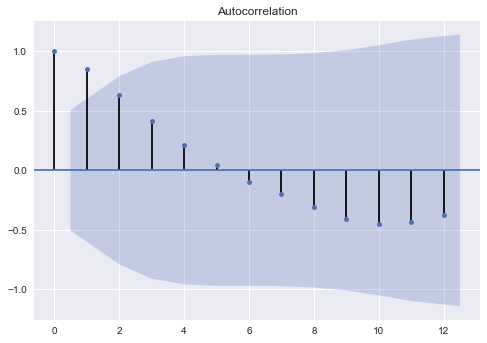

C:\Users\LPLEN00245\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


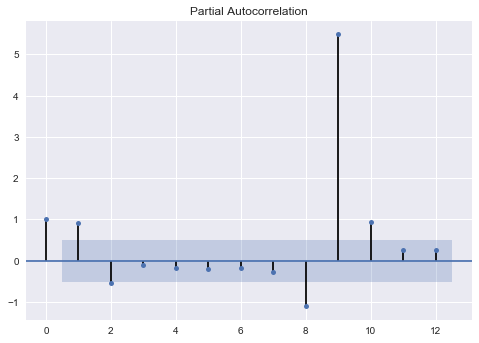

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# AFC plot
plot_acf(df_timeseries.LinkedTrip)
plt.show()

#PAFC plot
plot_pacf(df_timeseries.LinkedTrip)
plt.show()

For this example, let's assume the dataset is stationary and we want to model an ARIMA(1,0,1) model. When developing a time series model you can test different parameter values based on the PACF and ACF plots.

In [35]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_timeseries.LinkedTrip, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             LinkedTrip   No. Observations:                   15
Model:                     ARMA(1, 1)   Log Likelihood                -263.198
Method:                       css-mle   S.D. of innovations        8758525.128
Date:                Wed, 12 Oct 2022   AIC                            534.397
Time:                        23:33:03   BIC                            537.229
Sample:                             0   HQIC                           534.366
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              4.76e+08   4.61e+07     10.329      0.000    3.86e+08    5.66e+08
ar.L1.LinkedTrip     0.9584      0.052     18.392      0.000       0.856       1.060
ma.L1.LinkedTrip     0.7140 

C:\Users\LPLEN00245\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Note that to estimate a multivariate time series regression model, you will need to employ a different method (e.g., Vector Autoregressive models). 

## Static Panel Regression
Going back to our panel dataset, let's attempt to run a panel data regression model of all agencies in Ontario this time.

In [36]:
#subset data
df_ON = df_reduced[df_reduced["Province"] == 'ON']
#check that we only have agencies from Ontario
df_ON

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,RvnKM,AdCash_Fare,Gas_P_Adj,OpCost_Adj
702,Barrie_2002,BARRIE,52,ON,2002,1706300.0,76.982,108654.0,976.817853,95889.0,95889.0,2.588600,88.098687,6.375069e+06
703,Barrie_2003,BARRIE,52,ON,2003,1778000.0,76.984,113598.0,1021.265374,101135.0,101135.0,2.781900,89.845067,6.808354e+06
704,Barrie_2004,BARRIE,52,ON,2004,1906503.0,76.986,118542.0,1065.712427,114255.0,114255.0,2.763000,96.848267,8.026542e+06
705,Barrie_2005,BARRIE,52,ON,2005,2153108.0,76.988,123486.0,1110.160080,123835.0,123835.0,2.705625,108.826250,9.342041e+06
706,Barrie_2006,BARRIE,52,ON,2006,2347764.0,76.990,128430.0,1154.607340,128835.0,128835.0,2.648025,111.452430,1.011147e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,York Region_2012,YORK REGION,91,ON,2012,22156780.0,1762.162,1048001.0,478.313847,1008199.0,1008199.0,3.670450,134.023860,1.673918e+08
1223,York Region_2013,YORK REGION,91,ON,2013,22709611.0,1762.154,1063478.0,485.377772,1073712.0,1073712.0,3.884625,133.527510,1.787307e+08
1224,York Region_2014,YORK REGION,91,ON,2014,22445497.0,1762.146,1078955.0,492.441465,1086003.0,1086003.0,4.096800,132.770460,1.777762e+08
1225,York Region_2015,YORK REGION,91,ON,2015,22123964.0,1762.138,1094432.0,499.505346,1020909.0,1020909.0,4.054400,109.570160,1.798203e+08


<b>Pooled OLS</b>
The pooled OLS ignores the panel structure of the dataset 

In [37]:
df_ON = df_ON.dropna()

# add log transformed variables again
var_list = df_ON.columns
#remove columns we are not transforming
var_list = var_list[5:]

#loop each variable to apply the natural log transformation
for var in var_list:
    #give the column a new name
    new_var = var + "_ln"
    df_ON[new_var] = np.log(df_ON[var])

C:\Users\LPLEN00245\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [38]:
#Estimate pooled OLS model
X = df_ON[['RvnKM_ln', 'AdCash_Fare_ln', 'Gas_P_Adj_ln']]
X = sm.add_constant(X)
y = df_ON['LinkedTrip_ln']

pooled_model = sm.OLS(y, X).fit()
pooled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LinkedTrip_ln   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6424.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:33:23   Log-Likelihood:                -109.53
No. Observations:                 457   AIC:                             227.1
Df Residuals:                     453   BIC:                             243.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1794      0.505      0.356      0.722      -0.812       1.171
RvnKM_ln           1.2440      0.012    103.707      0.000       1.220       1.268
AdCash_Fare_ln    -0.7226      0.139     -5.192      0.000      -0.996      -0.449
Gas_P_Adj_ln       0.1662      0.107      1.546      0.123      -0.045       0.377
==============================================================================
Omnibus:                        2.005   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.778
Skew:                          -0.133   Prob(JB):                        0.411
Kurtosis:                       3.150   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Fixed Effects</b>

The key assumption of the Fixed Effects model is that the unobservable effects are correlated with the regression variables of the model. The Fixed Effects model takes the approach of introducing a unit-specific bias term into the regression model. To code this, we can estimate an OLS model that contains a set of dummy variables for each group in your dataset (minus 1 to avoid multicollinarity).

Reference: https://timeseriesreasoning.com/contents/the-fixed-effects-regression-model-for-panel-data-sets/

In [39]:
import statsmodels.formula.api as smf

In [40]:
# create a copy of the dataset
df_fe = df_ON.copy()

In [41]:
# format the column to use in the model
df_fe['New_names'] = df_fe['New_names'].str.replace(' ', '_')
df_fe['New_names'] = df_fe['New_names'].str.replace('.', '')

In [42]:
#Create the dummy variables, one for each agency
df_dummies = pd.get_dummies(df_fe['New_names'])

#Join the dummies Dataframe to the panel data set:
df_fe = df_fe.join(df_dummies)

#inspect
df_fe

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,...,STRATFORD,ST_CATHARINES,Sarnia,THUNDER_BAY,TIMMINS,TORONTO,WELLAND,WINDSOR,Waterloo_Region,YORK_REGION
702,Barrie_2002,BARRIE,52,ON,2002,1706300.0,76.982,108654.0,976.817853,95889.0,...,0,0,0,0,0,0,0,0,0,0
703,Barrie_2003,BARRIE,52,ON,2003,1778000.0,76.984,113598.0,1021.265374,101135.0,...,0,0,0,0,0,0,0,0,0,0
704,Barrie_2004,BARRIE,52,ON,2004,1906503.0,76.986,118542.0,1065.712427,114255.0,...,0,0,0,0,0,0,0,0,0,0
705,Barrie_2005,BARRIE,52,ON,2005,2153108.0,76.988,123486.0,1110.160080,123835.0,...,0,0,0,0,0,0,0,0,0,0
706,Barrie_2006,BARRIE,52,ON,2006,2347764.0,76.990,128430.0,1154.607340,128835.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,York Region_2012,YORK_REGION,91,ON,2012,22156780.0,1762.162,1048001.0,478.313847,1008199.0,...,0,0,0,0,0,0,0,0,0,1
1223,York Region_2013,YORK_REGION,91,ON,2013,22709611.0,1762.154,1063478.0,485.377772,1073712.0,...,0,0,0,0,0,0,0,0,0,1
1224,York Region_2014,YORK_REGION,91,ON,2014,22445497.0,1762.146,1078955.0,492.441465,1086003.0,...,0,0,0,0,0,0,0,0,0,1
1225,York Region_2015,YORK_REGION,91,ON,2015,22123964.0,1762.138,1094432.0,499.505346,1020909.0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df_fe.columns

Index(['Con_2', 'New_names', 'UID_TA', 'Province', 'Year', 'LinkedTrip',
       'LandArea', 'Pop', 'Pop_Dens', 'RvnHours', 'RvnKM', 'AdCash_Fare',
       'Gas_P_Adj', 'OpCost_Adj', 'LinkedTrip_ln', 'LandArea_ln', 'Pop_ln',
       'Pop_Dens_ln', 'RvnHours_ln', 'RvnKM_ln', 'AdCash_Fare_ln',
       'Gas_P_Adj_ln', 'OpCost_Adj_ln', 'BARRIE', 'BELLEVILLE', 'BRAMPTON',
       'BRANTFORD', 'BURLINGTON', 'COBOURG', 'CORNWALL', 'GUELPH',
       'Greater_Sudbury', 'HAMILTON', 'KINGSTON', 'LONDON', 'Leamington',
       'Loyalist_Township', 'MILTON', 'MISSISSAUGA', 'NIAGARA_FALLS',
       'NORTH_BAY', 'OAKVILLE', 'OTTAWA', 'PETERBOROUGH', 'SAULT_STE_MARIE',
       'STRATFORD', 'ST_CATHARINES', 'Sarnia', 'THUNDER_BAY', 'TIMMINS',
       'TORONTO', 'WELLAND', 'WINDSOR', 'Waterloo_Region', 'YORK_REGION'],
      dtype='object')

In [44]:
# define the x and y variables
y_var_name = 'LinkedTrip_ln'
X_var_names = ['RvnKM_ln', 'AdCash_Fare_ln', 'Gas_P_Adj_ln']

#define the units
unit_names = df_fe['New_names'].unique()

In [45]:
fe_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        fe_expr = fe_expr + ' + ' + X_var_name
    else:
        fe_expr = fe_expr + X_var_name
    i = i + 1

# all groups minus 1
for dummy_name in unit_names[:-1]:
    fe_expr = fe_expr + ' + ' + dummy_name
 
print('Regression expression for OLS with dummies=' + fe_expr)

Regression expression for OLS with dummies=LinkedTrip_ln ~ RvnKM_ln + AdCash_Fare_ln + Gas_P_Adj_ln + BARRIE + BELLEVILLE + BRAMPTON + BRANTFORD + BURLINGTON + COBOURG + CORNWALL + Greater_Sudbury + GUELPH + HAMILTON + KINGSTON + Leamington + LONDON + Loyalist_Township + MILTON + MISSISSAUGA + NIAGARA_FALLS + NORTH_BAY + OAKVILLE + OTTAWA + PETERBOROUGH + Sarnia + SAULT_STE_MARIE + ST_CATHARINES + STRATFORD + THUNDER_BAY + TIMMINS + TORONTO + Waterloo_Region + WELLAND + WINDSOR


In [46]:
fe_model = smf.ols(formula=fe_expr, data=df_fe)
fe_model_results = fe_model.fit()
print(fe_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:          LinkedTrip_ln   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3364.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:33:32   Log-Likelihood:                 309.12
No. Observations:                 457   AIC:                            -548.2
Df Residuals:                     422   BIC:                            -403.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3748      0.50

From the results, take a look at which variables are significant/insignificant. While transit supply and gas prices are both significant and have expected signs, fare was found to be insignificant. 

You can also compare the estimated agency-specific effects. We observe that the Intercept of regression which represents the agency-specific effect for York Region (the omitted variable) is 3.3748 and it is statistically significant.

The coefficient for the dummy variable for the TTC is 1.2219 and it is significant at a p-value of 0.000, indicating that  The actual agency-specific effect for TTC is calculated as 3.3748+1.2219 = 4.5967 Any dummy variable that is not statistically significant (e.g., Kingston, Greater Sudbury, etc.) means that their agency-specific effect can be considered to be the identical to that for York Region.

You should also analyze the goodness-of-fit of your model using various tests:
- Adjusted R-square: measures the fraction of the variance in the response variable y that the model was able to explain after accounting for the degrees of freedom lost due to the presence of regression variables
- F-test for regression analysis tests whether all model coefficients are jointly significant and therefore if the goodness-of-fit of the FE model is better than that of the intercept only model
- Log-likelihood and AIC score: These values by themselves are meaningless. We need to compare them with the corresponding values of a competing model (e.g., Pooled OLS regression model). the higher the higher the value of the log-likelihood, the better a model fits a dataset while the lower the AIC score, the better.

<b>Random Effects</b>

In [47]:
import statsmodels.formula.api as smf

In [48]:
# create a copy of the dataset
df_re = df_ON.copy()

In [49]:
df_re

,Con_2,New_names,UID_TA,Province,Year,LinkedTrip,LandArea,Pop,Pop_Dens,RvnHours,...,OpCost_Adj,LinkedTrip_ln,LandArea_ln,Pop_ln,Pop_Dens_ln,RvnHours_ln,RvnKM_ln,AdCash_Fare_ln,Gas_P_Adj_ln,OpCost_Adj_ln
702,Barrie_2002,BARRIE,52,ON,2002,1706300.0,76.982,108654.0,976.817853,95889.0,...,6.375069e+06,14.349838,4.343572,11.595924,6.884300,11.470947,11.470947,0.951117,4.478458,15.667906
703,Barrie_2003,BARRIE,52,ON,2003,1778000.0,76.984,113598.0,1021.265374,101135.0,...,6.808354e+06,14.391000,4.343598,11.640421,6.928798,11.524212,11.524212,1.023134,4.498087,15.733661
704,Barrie_2004,BARRIE,52,ON,2004,1906503.0,76.986,118542.0,1065.712427,114255.0,...,8.026542e+06,14.460781,4.343624,11.683023,6.971399,11.646188,11.646188,1.016317,4.573145,15.898264
705,Barrie_2005,BARRIE,52,ON,2005,2153108.0,76.988,123486.0,1110.160080,123835.0,...,9.342041e+06,14.582423,4.343650,11.723883,7.012260,11.726705,11.726705,0.995333,4.689753,16.050035
706,Barrie_2006,BARRIE,52,ON,2006,2347764.0,76.990,128430.0,1154.607340,128835.0,...,1.011147e+07,14.668974,4.343676,11.763139,7.051516,11.766288,11.766288,0.973814,4.713598,16.129181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,York Region_2012,YORK REGION,91,ON,2012,22156780.0,1762.162,1048001.0,478.313847,1008199.0,...,1.673918e+08,16.913654,7.474297,13.862395,6.170267,13.823676,13.823676,1.300314,4.898018,18.935848
1223,York Region_2013,YORK REGION,91,ON,2013,22709611.0,1762.154,1063478.0,485.377772,1073712.0,...,1.787307e+08,16.938299,7.474292,13.877055,6.184927,13.886632,13.886632,1.357026,4.894308,19.001390
1224,York Region_2014,YORK REGION,91,ON,2014,22445497.0,1762.146,1078955.0,492.441465,1086003.0,...,1.777762e+08,16.926601,7.474288,13.891504,6.199376,13.898015,13.898015,1.410206,4.888622,18.996036
1225,York Region_2015,YORK REGION,91,ON,2015,22123964.0,1762.138,1094432.0,499.505346,1020909.0,...,1.798203e+08,16.912172,7.474283,13.905746,6.213618,13.836204,13.836204,1.399803,4.696565,19.007468


In [50]:
re = smf.mixedlm("LinkedTrip_ln ~ RvnKM_ln + AdCash_Fare_ln + Gas_P_Adj_ln", df_re, groups=df_re["UID_TA"])
re_model = re.fit() 
re_model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: LinkedTrip_ln
No. Observations: 457     Method:             REML         
No. Groups:       32      Scale:              0.0169       
Min. group size:  5       Likelihood:         198.5653     
Max. group size:  15      Converged:          Yes          
Mean group size:  14.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         1.900    0.455  4.171 0.000  1.007  2.792
RvnKM_ln          1.026    0.043 23.911 0.000  0.942  1.110
AdCash_Fare_ln   -0.106    0.097 -1.089 0.276 -0.295  0.084
Gas_P_Adj_ln      0.213    0.049  4.353 0.000  0.117  0.309
Group Var         0.178    0.498                           
===========================================================

"""

As with the FE model, fare is again found to be insignificant. The Hausman test is commonly used to help choose between FE and RE, although this decision should also be made based on the literature and what your research goals are. 

## Dynamic Panel Model
A static panel model becomes dynamic when lagged dependent variable is present as one of your predictors. It is important to consider whether a dynamic specification is appropriate for your research context and whether your dataset dimension is suitable for a dynamic panel model. For example, the commonly used Arellano-Bond and Systen GMM estimator is only suitable for small T, large N panels (few time periods with many individual units). If T is too large, the dynamic panel bias becomes insignificant and a more straightforward FE estimator typically works better while the number of instruments tend to explode with T. If N is small, the cluster–robust standard errors and the Arellano–Bond autocorrelation test may be unreliable.

To estimate dynamic panel models in Python, we will use the package "pydynpd", which is similar to the Stata package "xtabond2" and a number of R packages.

In [53]:
pip install pydynpd

Note: you may need to restart the kernel to use updated packages.


In [54]:
from  pydynpd import regression

The abond function contains three arguments, a command string, the dataframe, and an identifier for the year and individual.

The command string also contains two or three parts as well:
- Part one is a list that starts with the dependent variable (in our case, LinkedTrip_ln), followed by independent variables. Lag operators can be used in command string. For example, L2.x means to lag variable n two periods. Shortcut L(1:2).xn means lags 1 through 2 of variable x, and is equivalent to L1.x L2.x. In our example, we have a 1 period lag of the dependent variable.
- Part two desribes how instruments are created. More specifically, GMM(variable list, min_lag: max_lag) indicates that lags min_lag through max_lag of each variable included in list of variables are used to generate instruments. For example, GMM(w k, 1:3) means lags 1 through 3 of variables w and k are treated as instruments, which implies that w and k are predetermined variables. On the other hand, IV(variable list) means each variable on variable list is treated as instrument. In our example, we will account for the endogenity of transit supply by specifying it as 
- Part three is optional. It includes the following possible options:
    - onestep: perform one-step estimation rather than the default two-step estimation.
    - nolevel: only perform difference GMM
    - timedumm: include time dummies
    - collapse: collapse instruments
    
For more information on how to create instruments and what each option does, please refer to the following resource:
- Roodman D. How to do Xtabond2: An Introduction to Difference and System GMM in Stata. The Stata Journal. 2009;9(1):86-136. doi:10.1177/1536867X0900900106

Independent variables will be specified as either:
- Strictly exogenous: All past, present and future values are uncorrelated with the error term. 
- Predetermined: Current error term is uncorrelated with current. 
- Strictly endogenous: Variable is correlated with error term and is changed or determined by its relationship with other variables in the model (e.g., transit supply). 

The standard treatment for each of these variables is discussed in details here: https://github.com/dazhwu/pydynpd/blob/main/vignettes/Tutorial.ipynb

To determine which whether your variables are exogenous, predetermined or strictly endogenous (in order to specify your variable accordingly in the dynamic panel model) will largely be driven by theory and literature. 

In [58]:
command_str='LinkedTrip_ln L1.LinkedTrip_ln RvnKM_ln AdCash_Fare_ln Gas_P_Adj_ln | endo(RvnKM_ln) pred(AdCash_Fare_ln) | timedumm  nolevel'
dpd = regression.abond(command_str, df_ON, ['UID_TA', 'Year'])

 Dynamic panel-data estimation, two-step difference GMM
 Group variable: UID_TA                            Number of obs = 391      
 Time variable: Year                               Min obs per group: 3     
 Number of instruments = 211                       Max obs per group: 13    
 Number of groups = 32                             Avg obs per group: 12.22 
+------------------+------------+---------------------+------------+-----------+-----+
|  LinkedTrip_ln   |   coef.    | Corrected Std. Err. |     z      |   P>|z|   |     |
+------------------+------------+---------------------+------------+-----------+-----+
| L1.LinkedTrip_ln | 0.6772284  |      0.0780600      | 8.6757435  | 0.0000000 | *** |
|     RvnKM_ln     | 0.3261047  |      0.1484372      | 2.1969202  | 0.0280261 |  *  |
|  AdCash_Fare_ln  | -0.0628643 |      0.2057974      | -0.3054668 | 0.7600106 |     |
|   Gas_P_Adj_ln   | -7.5783486 |      6.7551373      | -1.1218645 | 0.2619201 |     |
|    Year_2004     | 0.5925

The results of the dynamic panel model displays not only the coefficients, but two important post-estimation tests, the Hansen test and the autoregressive test. 

The Hansen over-identification test informs us whether our choices of instruments are not exogenous. We want to reject the null hypothesis. However, with a p-value of 1.00, this likely indicates there are <b>too many instruments</b> and we cannot trust the validity of this test. Note the number of instruments reported as well - it is very high.

For the autoregressive test, the aim is to check whether the idiosyncratic error term is serially correlated. Therefore, we should reject the null hypothesis of no first-order serial correlation in first differences (AR(1) test) but should not reject the null hypothesis of no higher-order serial correlation in first differences (AR(2), AR(3), ...). This is shown in our results, as we have a signficant AR(1) test, but a non-significant AR(2) test. If you do not reject the null hypothesis of the AR(1) test, this could indicate that your idiosyncratic error term in levels is highly serially correlated. 